In [2]:
# 加载路透社的数据集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(test_data))
print(train_data[3])

8982 2246
[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 465, 893, 3541, 114, 2902, 69, 312, 35, 15, 7, 335, 1679, 21, 25, 3675, 2, 3498, 58, 69, 68, 493, 5, 25, 465, 377, 2430, 4, 293, 1172, 739, 4379, 8, 7, 1510, 1131, 13, 899, 6, 4, 990, 309, 415, 4519, 6920, 645, 3916, 791, 5, 4379, 75, 8, 24, 10, 1311, 4677, 5, 344, 756, 7, 2, 231, 9691, 2603, 1413, 43, 509, 43, 68, 327, 5, 2, 3498, 297, 638, 73, 430, 22, 4, 580, 7, 48, 41, 30, 2, 136, 4, 344, 298, 4, 580, 40, 344, 5078, 2, 291, 1488, 10, 3148, 5, 231, 6250, 1308, 5, 8250, 7043, 21, 2, 1622, 990, 309, 415, 265, 5992, 8945, 1149, 9118, 2, 4, 344, 9691, 756, 3729, 2, 4667, 2, 3249, 28, 10, 2190, 24, 77, 41, 682, 10, 4851, 2048, 7, 4, 5540, 2926, 1598, 22, 370, 5954, 7541, 5, 54, 5232, 1685, 2916, 10, 1571, 946, 60, 51, 3249, 5249, 4, 73, 2135, 669, 4, 580, 64, 10, 4280, 6, 2, 25, 482, 35, 150, 377, 2430, 7, 10, 2, 836, 2, 4730, 6920, 5, 4379, 2, 2, 3541, 8, 4, 344, 291, 2, 298, 4228, 6, 2223, 24, 2, 41, 343, 430, 210, 6, 3498, 297, 64,

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])
print(decoded_newswire)

? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but 

In [7]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    # 创建一个形状为len(sequences), 10000的矩阵
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


# 将测试和训练数据都进行one hot编码
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 46个分类做one-hot编码
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
         results[i, label] = 1.
    return results
# 训练标签向量化
one_hot_train_labels = to_one_hot(train_labels)
# 测试标签向量化
one_hot_test_labels = to_one_hot(test_labels)


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
print(x_val.shape, partial_x_train.shape)
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
print(y_val.shape, partial_y_train.shape)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20 ,batch_size=512, validation_data=(x_val, y_val))

(1000, 10000) (7982, 10000)
(1000, 46) (7982, 46)
Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.7951 - accuracy: 0.4915 - val_loss: 1.7930 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4240 - accuracy: 0.7098 - val_loss: 1.3117 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0336 - accuracy: 0.7821 - val_loss: 1.1235 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8120 - accuracy: 0.8281 - val_loss: 1.0149 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6486 - accuracy: 0.8651 - val_loss: 0.9446 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5182 - accuracy: 0.8975 - val_loss: 0.9031 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4194 - accuracy: 0.9166 - val

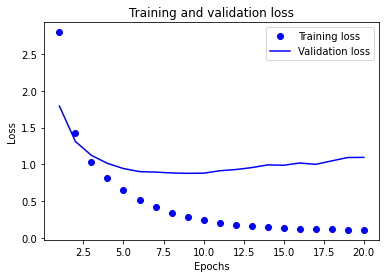

In [11]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)

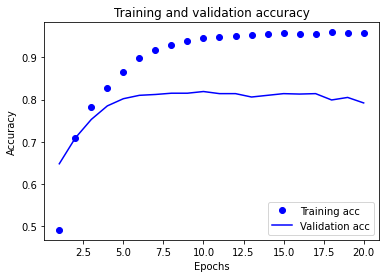

In [12]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

In [20]:
# 预计第九轮后会overfit，重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.5743 - accuracy: 0.5368 - val_loss: 1.6830 - val_accuracy: 0.6590
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.3733 - accuracy: 0.7127 - val_loss: 1.3004 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0326 - accuracy: 0.7765 - val_loss: 1.1236 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8111 - accuracy: 0.8270 - val_loss: 1.0383 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6456 - accuracy: 0.8607 - val_loss: 0.9910 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5191 - accuracy: 0.8886 - val_loss: 0.9216 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4179 - accuracy: 0.9108 - val_loss: 0.9065 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [17]:
# 上述分类精度达到80%和完全随机的分类的18%相比非常不错
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array))/ len(test_labels))


0.1803205699020481


In [21]:
predictions = model.predict(x_test)
# 结果应该是一个长度为46的向量，代表每个分类可能的概率
print(predictions[0].shape)
# 确保该向量之和只有1
print(np.sum(predictions[0]))

print(predictions[0])
print(np.argmax(predictions[0]))

(46,)
1.0000001
[3.60454811e-04 2.82839785e-04 5.01820723e-05 2.51792341e-01
 6.66751862e-01 3.98236152e-04 4.86558565e-04 6.03019325e-05
 1.71487052e-02 8.95330450e-05 3.07396753e-04 1.72960199e-02
 3.88674671e-04 5.13609173e-03 8.27534939e-04 9.98873747e-06
 5.50918374e-03 2.06855033e-03 8.22100628e-05 3.38137383e-03
 1.17437607e-02 1.34355109e-03 2.16468197e-05 3.65324062e-03
 1.11843641e-04 2.67120718e-04 1.04135315e-05 5.30190358e-04
 3.07009148e-04 6.46086119e-04 2.27510376e-04 9.60043340e-04
 7.91598577e-04 5.32558188e-05 1.05084025e-03 1.12185699e-04
 1.22515019e-03 1.24334020e-03 4.38537536e-04 1.51143805e-03
 6.53572322e-04 2.78244261e-04 1.69259700e-04 1.39023454e-04
 3.66337226e-05 4.65308876e-05]
4
